#ETHEREUM FRAUD DETECTION 


To predict weather the transaction is fraudulent or not-fraudulent using the transaction data.

# Dataset Desciption  
The dataset folder contains the following files:  
transaction_dataset.csv : (9841, 51)

 # Columns Provided in the Dataset

Index: the index number of a row

Address: the address of the ethereum account

FLAG: whether the transaction is fraud or not

Avg min between sent tnx: Average time between sent transactions for account in minutes

Avgminbetweenreceivedtnx: Average time between received transactions for account in minutes

TimeDiffbetweenfirstand_last(Mins): Time difference between the first and last transaction

Sent_tnx: Total number of sent normal transactions

Received_tnx: Total number of received normal transactions

NumberofCreated_Contracts: Total Number of created contract transactions

UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transactions

UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions

MinValueReceived: Minimum value in Ether ever received

MaxValueReceived: Maximum value in Ether ever received

AvgValueReceived5Average value in Ether ever received

MinValSent: Minimum value of Ether ever sent

MaxValSent: Maximum value of Ether ever sent

AvgValSent: Average value of Ether ever sent

MinValueSentToContract: Minimum value of Ether sent to a contract

MaxValueSentToContract: Maximum value of Ether sent to a contract

AvgValueSentToContract: Average value of Ether sent to contracts

TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions

TotalEtherSent:Total Ether sent for account address

TotalEtherReceived: Total Ether received for account address

TotalEtherSent_Contracts: Total Ether sent to Contract addresses

TotalEtherBalance: Total Ether Balance following enacted transactions

TotalERC20Tnxs: Total number of ERC20 token transfer transactions

ERC20TotalEther_Received: Total ERC20 token received transactions in Ether

ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether

ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether

ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses

ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses

ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses

ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes

ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes

ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions

ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account

ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account

ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account

ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account

ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account

ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account

ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred

ERC20UniqRecTokenName: Number of Unique ERC20 tokens received

ERC20MostSentTokenType: Most sent token for account via ERC20 transaction

ERC20MostRecTokenType: Most received token for account via ERC20 transactions

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [160]:
# Read csv file using pandas
df = pd.read_csv("/content/drive/MyDrive/Ethereum Dataset Capstone/transaction_dataset.csv")


In [161]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


# BASIC EDA

In [162]:
#check shape of the dataset
df.shape

(9841, 51)

In [163]:
# check columns of dataset
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [164]:
#drop Unnamed: 0, Address, Index from dataset
df.drop(['Unnamed: 0', 'Address', 'Index'], axis = 1, inplace = True)

In [165]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [166]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [167]:
# check length of dataset
len(df)

9841

In [168]:
# loop through datatset to find count of unique values of each column
df.nunique()

FLAG                                                       2
Avg min between sent tnx                                5013
Avg min between received tnx                            6223
Time Diff between first and last (Mins)                 7810
Sent tnx                                                 641
Received Tnx                                             727
Number of Created Contracts                               20
Unique Received From Addresses                           256
Unique Sent To Addresses                                 258
min value received                                      4589
max value received                                      6302
avg val received                                        6767
min val sent                                            4719
max val sent                                            6647
avg val sent                                            5854
min value sent to contract                                 3
max val sent to contract

In [169]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [170]:
# Using pandas
df.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,-0.019259,-0.011881,0.006626,-0.022437,-0.063556,-0.007213,-0.007988,-0.008883,-0.100289,-0.014993,-0.016900,-0.007988,-0.003229,-0.025697,-0.004475,0.024762,0.013514,-0.020554,-0.017539,-0.003047,-0.018527,nan,nan,nan,nan,0.011163,-0.004313,0.007881,0.025364,0.025038,0.025044,nan,nan,nan,0.009249,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,-0.007104,-0.004382,-0.000789,-0.005716,0.003597,-0.000210,0.001044,0.000759,-0.043586,-0.006440,-0.007285,0.001044,-0.001425,-0.012307,-0.002542,-0.002105,-0.004409,-0.009477,-0.001133,-0.012754,0.045615,nan,nan,nan,nan,0.004673,-0.002456,-0.003149,-0.001687,-0.002020,-0.001965,nan,nan,nan,0.000529,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,-0.011575,-0.009313,-0.008761,-0.012176,-0.040011,-0.003916,-0.003230,-0.003940,-0.060711,-0.009442,-0.010720,-0.003230,-0.002149,-0.020578,-0.003656,-0.003876,-0.006160,-0.014776,-0.016037,-0.014698,-0.014932,nan,nan,nan,nan,-0.008319,-0.003544,-0.005606,-0.003758,-0.003780,-0.003727,nan,nan,nan,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,-0.002240,-0.014002,-0.013107,0.014194,-0.046039,0.001734,0.036162,0.029440,0.189311,0.012999,0.014756,0.036162,0.002955,0.075922,0.046788,-0.005014,-0.008389,0.040686,0.080709,0.019961,0.319176,nan,nan,nan,nan,-0.010543,0.046512,0.049020,-0.006852,-0.006268,-0.006802,nan,nan,nan,0.263939,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,0.102109,0.140677,-0.004846,0.225356,0.027468,0.029529,0.013263,0.020865,0.731503,0.244434,0.155811,0.013263,-0.127211,0.381311,0.006683,-0.000315,-0.002897,0.356065,0.300461,-0.008379,0.219665,nan,nan,nan,nan,-0.003868,0.004291,0.008843,-0.001557,-0.001019,-0.001415,nan,nan,nan,0.079728,0.220614
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,0.224805,-0.001786,0.093448,0.097769,0.125075,0.020645,0.008243,0.013767,0.806393,0.132150,0.235282,0.008243,0.158146,0.116203,0.016501,-0.000452,0.104870,0.044187,0.136485,0.337727,0.201686,nan,nan,nan,nan,-0.004464,0.015379,0.019126,-0.001899,-0.000744,-0.000918,nan,nan,nan,0.042681,0.202747
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,-0.000752,-0.000498,-0.000913,0.141919,-0.001083,-0.000261,-0.000225,-0.000270,0.281428,0.024877,-0.000753,-0.000225,-0.037902,0.249500,0.002072,0.001166,-0.000374,0.154788,0.190646,-0.001083,0.028986,nan,nan,nan,nan,-0.000788,0.000920,0.002052,-0.000092,0.00014

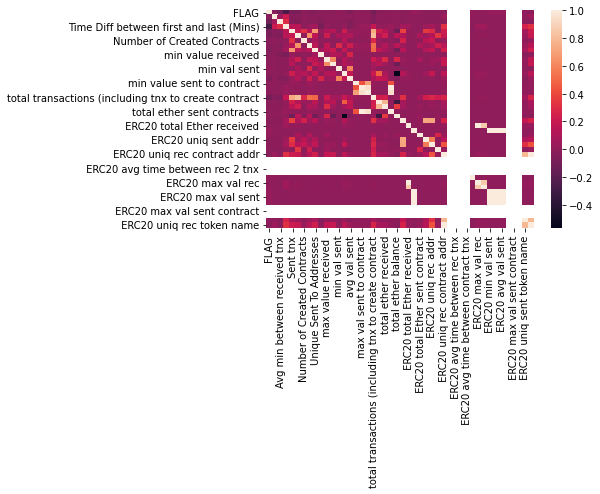

In [171]:
 #Using seaborn

sns.heatmap(df.corr())

# CHECKING IF DATASET IS SKEWED OR NOT

#Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

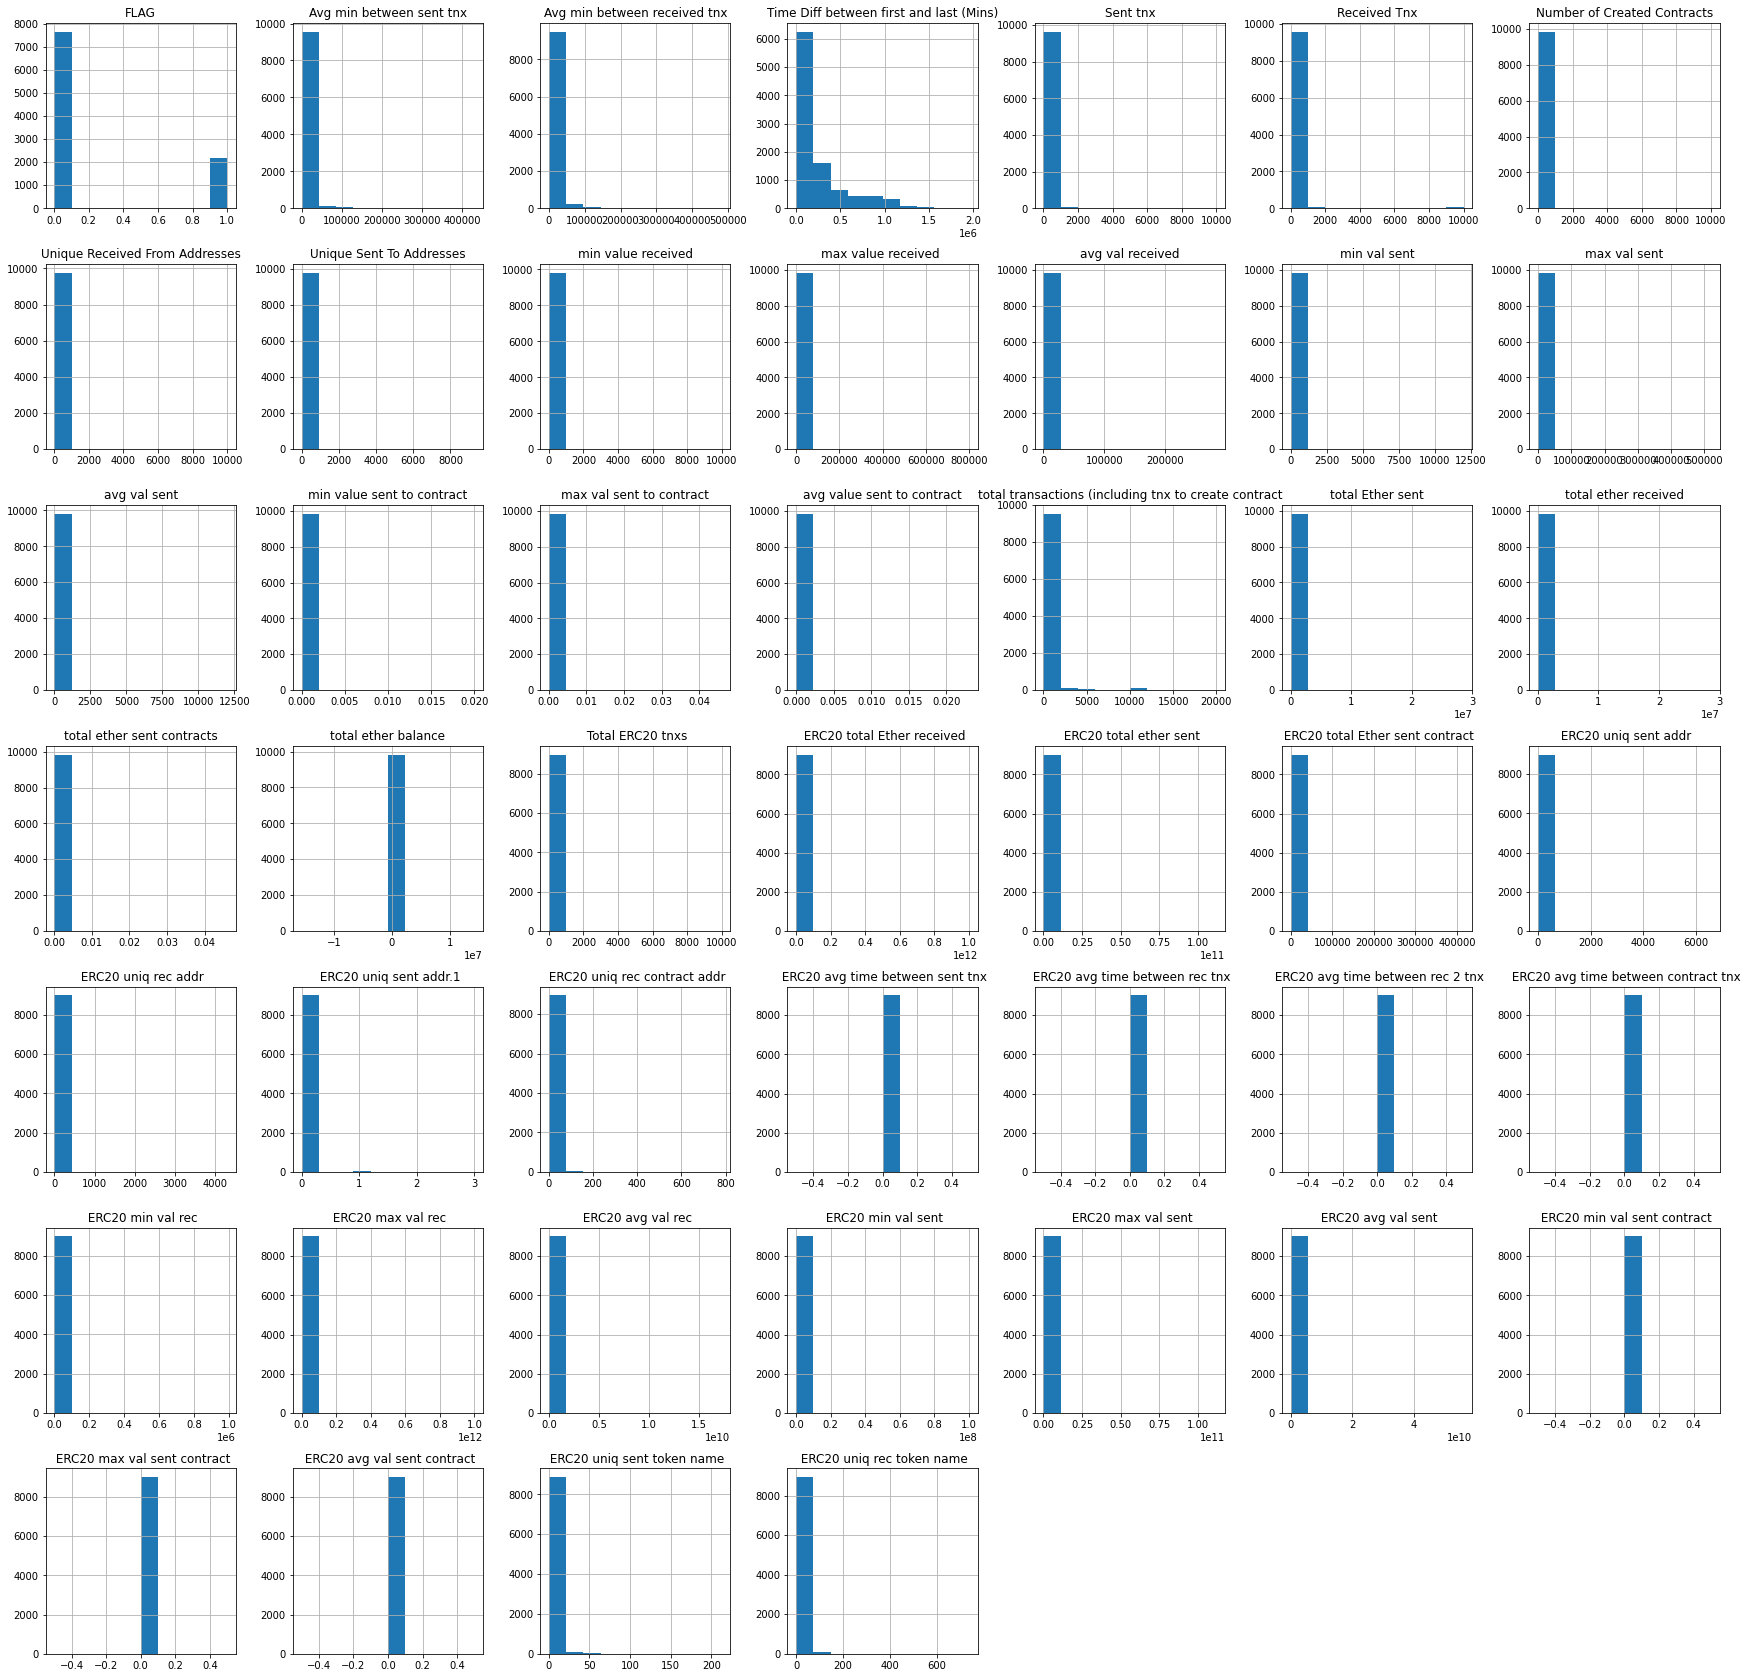

In [172]:
# Histogram using pandas
df.hist(figsize=(30,30));


In [173]:
# check skewness of dataset
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

After checking skewness of dataset and from histogram we can see that the dataset is heavily skewed, with most of the weight being on the left tail.

# CHECKING IF DATASET IS BALANCED OR NOT

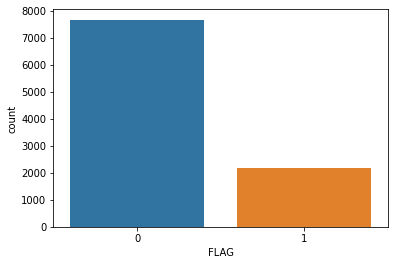

In [174]:
# count plot of flag column
sns.countplot(x = 'FLAG', data = df)

In [175]:
# check total number of fraudulent and non-fraudulent instances
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [176]:
df['FLAG'].isnull().sum()

0

In [177]:
# find Percentage of non-fraudulent instances
print('Percentage of non-fraudulent instances: ',round(7662/len(df)*100), '%' )

Percentage of non-fraudulent instances:  78 %


In [178]:
# find Percentage of fraudulent instances
print('Percentage of fraudulent instances: ',round(2179/len(df)*100), '%' )

Percentage of fraudulent instances:  22 %


The dataset is heavily imbalanced with only 22% of fraudulent instance.

# understanding more about dataset

In [180]:
# display unique values in categorical columns
display(np.unique(df[' ERC20 most sent token type'].astype(str)))
display(np.unique(df[' ERC20_most_rec_token_type'].astype(str)))

array(['\x01', ' ', '$7RIP$', "''", '0', '0xBitcoin Token',
       '0xcert Protocol Token', '1World', '300 Token', 'AION',
       'ARBITRAGE', 'AVT', 'AdBank', 'AdEx', 'Aditus', 'Adshares',
       'Aeron', 'Aeternity', 'Aigang', 'AirSwap', 'AirToken',
       'AnyCoinVer10', 'AppCoins', 'Aragon', 'ArcBlock',
       'Arcona Distribution Contract', 'Authorship', 'BAI', 'BANCA',
       'BANKEX', 'BAT', 'BCDN', 'BCG.to', 'BCShareS', 'BIX Token',
       'BMChain Token', 'BNB', 'BOMB', 'BUZCOIN', 'Bancor',
       'Banker Token', 'BinaryCoin', 'BitDice', 'BizCoin',
       'Blackmoon Crypto Token', 'BlockchainPoland', 'Blocktix',
       'Bounty0x', 'Brickblock', 'Bytom', 'CCRB', 'CRYPTOPUNKS',
       'Cai Token', 'CarTaxi', 'Cashaa', 'Celsius', 'Centra',
       'ChainLink Token', 'ChangeBank', 'CharterCoin', 'Cindicator',
       'Civic', 'Cobinhood', 'Cofoundit', 'CoinBene Coin', 'CoinBoin',
       'CoinDash', 'Countinghouse Fund', 'Covalent Token', 'Covesting',
       'Crypterium', 'Crypto.com

array(['\x01', ' ', '$P4C3', '0', '0xBitcoin Token', '1irst', '21Million',
       'A2A(B) STeX Exchange Token', 'ABCC invite', 'ABYSS',
       'AI Gaming Coin', 'AICRYPTO', 'AION', 'AIT', 'ALFA NTOK', 'ARP',
       'ATLANT', 'AdEx', 'Aeternity', 'AirCoin', 'Amber', 'Amplify',
       'An Etheal Promo', 'AnyCoinVer10', 'AppCoins', 'Aragon',
       'ArcBlock', 'Arcona Distribution Contract', 'ArtisTurba',
       'Asobicoin promo', 'Atonomi', 'Aurora', 'Authoreon', 'Authorship',
       'Avocado', 'Azbit', 'BAI', 'BANKEX', 'BAT', 'BAX', 'BBN', 'BCDN',
       'BCG.to', 'BCShareS', 'BCT Token', 'BMB', 'BNB', 'BOX Token',
       'BPTN', 'BRAT', 'BSB', 'BTOCoin', 'BUZCOIN', 'Bancor',
       'Beauty Coin', 'BeautyChain', 'Beth', 'Bi ecology Token',
       'BigBang Game Coin Token', 'Bigbom', 'Bilian', 'BinaryCoin',
       'Biograffi', 'BitAir', 'BitCAD', 'BitClave',
       'BitClave-ConsumerActivityToken', 'BitDegree', 'Bitcoin EOS',
       'Bitcoineum', 'BizCoin', 'BlitzPredict',
       'Blockc

In [181]:
# drop categorical columns
df = df.drop(columns = df.select_dtypes(include = 'object').columns, axis = 1)

Most of the tockens occur only once so they are irrelevant in fraud detection. So droped them.

In [182]:
# Replace missings of numerical variables with median
df = df.fillna(df.median())

In [183]:
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [184]:
df.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [185]:
# Filtering the features with 0 variance
zero_var = []
for i in df.columns:
  if df[i].var() == 0:
    zero_var.append(i)

print(zero_var)

# Drop features with 0 variance --- these features will not help in the performance of the model
df = df.drop(zero_var, axis = 1)

[' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract']


In [186]:
zero_features = []
for i in df.columns:
  if df[i].values.sum() == 0:
    zero_features.append(i)
zero_features

[]

In [187]:
def correlation(dataset, threshold):
  corr_features = set() #an empty set so that a name can't be repeated while assigning.
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        corr_features.add(colname)
  return corr_features



correlated_features = correlation(df, 0.8)

In [188]:
correlated_features

{' ERC20 avg val rec',
 ' ERC20 avg val sent',
 ' ERC20 max val rec',
 ' ERC20 max val sent',
 ' ERC20 min val sent',
 ' ERC20 uniq rec token name',
 'avg value sent to contract',
 'total ether sent contracts',
 'total transactions (including tnx to create contract'}

In [189]:
# drop columns that holds only zeros and highly correlated features
df.drop(columns = correlated_features, axis = 1, inplace = True)

In [190]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   Unique Received From Addresses           9841 non-null   int64  
 8   Unique Sent To Addresses                 9841 non-null   int64  
 9   min value received                       9841 non-null   float64
 10  max value received                       9841 no

In [191]:
#recheck the correlation matrix
df.corr().style.background_gradient(cmap='coolwarm')

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 uniq sent token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,-0.019259,-0.011881,0.006626,-0.022437,-0.063556,-0.007213,-0.007988,-0.014993,-0.016900,-0.003229,-0.034132,-0.005711,0.018428,0.008127,-0.025746,-0.027732,-0.011148,-0.052473,0.004434,-0.026290
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,-0.007104,-0.004382,-0.000789,-0.005716,0.003597,-0.000210,0.001044,-0.006440,-0.007285,-0.001425,-0.011061,-0.002339,-0.001916,-0.004101,-0.008615,-0.000021,-0.011862,0.047946,0.004998,0.003310
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,-0.011575,-0.009313,-0.008761,-0.012176,-0.040011,-0.003916,-0.003230,-0.009442,-0.010720,-0.002149,-0.019177,-0.003430,-0.003653,-0.005813,-0.013811,-0.014694,-0.013750,-0.011693,-0.007794,-0.016831
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,-0.002240,-0.014002,-0.013107,0.014194,-0.046039,0.001734,0.036162,0.012999,0.014756,0.002955,0.078482,0.046570,-0.004338,-0.007337,0.042630,0.083274,0.022216,0.324088,-0.008921,0.269025
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,0.102109,0.140677,-0.004846,0.225356,0.027468,0.029529,0.013263,0.244434,0.155811,-0.127211,0.381859,0.006840,-0.000158,-0.002652,0.356360,0.301136,-0.007671,0.221971,-0.003480,0.082239
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,0.224805,-0.001786,0.093448,0.097769,0.125075,0.020645,0.008243,0.132150,0.235282,0.158146,0.117093,0.016648,-0.000283,0.104939,0.044870,0.137358,0.337827,0.204128,-0.004043,0.045475
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,-0.000752,-0.000498,-0.000913,0.141919,-0.001083,-0.000261,-0.000225,0.024877,-0.000753,-0.037902,0.249601,0.002099,0.001192,-0.000334,0.154883,0.190766,-0.000967,0.029421,-0.000724,0.006475
Unique Received From Addresses,-0.031941,-0.015912,-0.029571,0.037043,0.130064,0.648655,-0.002211,1.000000,0.159829,-0.012939,0.175860,-0.001324,0.296240,0.058060,0.226712,0.053946,0.023258,0.028881,0.124897,0.144949,0.058263,0.002832,0.000146,0.116755,0.045573,0.083566,0.241752,0.149037,-0.001784,0.042108
Unique Sent To Addresses,-0.045584,-0.017688,-0.025747,0.071140,0.670014,0.164112,0.084598,0.159829,1.000000,0.070145,0.148182,0.207410,-0.003166,0.196573,0.022143,0.023183,0.010926,0.164535,0.086376,-0.113428,0.148625,0.005809,0.000102,-0.001697,0.122168,0.177536,-0.004908,0.238617,-0.002093,0.086414
min value received,-0.021641,-0.014886,-0.045753,-0.084996,0.024015,-0.022936,-0.001542,-0.012939,0.070145,1.000000,0.026710,0.122911,0.117682,0.015061,0.267280,-0.001820,-0.002015,-0.001748,-0.001874,-0.000233,-0.006751,-0.001580,-0.001488,-0.002331,-0.005452,-0.004305,-0.006740,-0.000881,-0.000847,-0.026315


In [192]:
# check columns of dataset
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 uniq sent token name'],
      dtype='object')

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

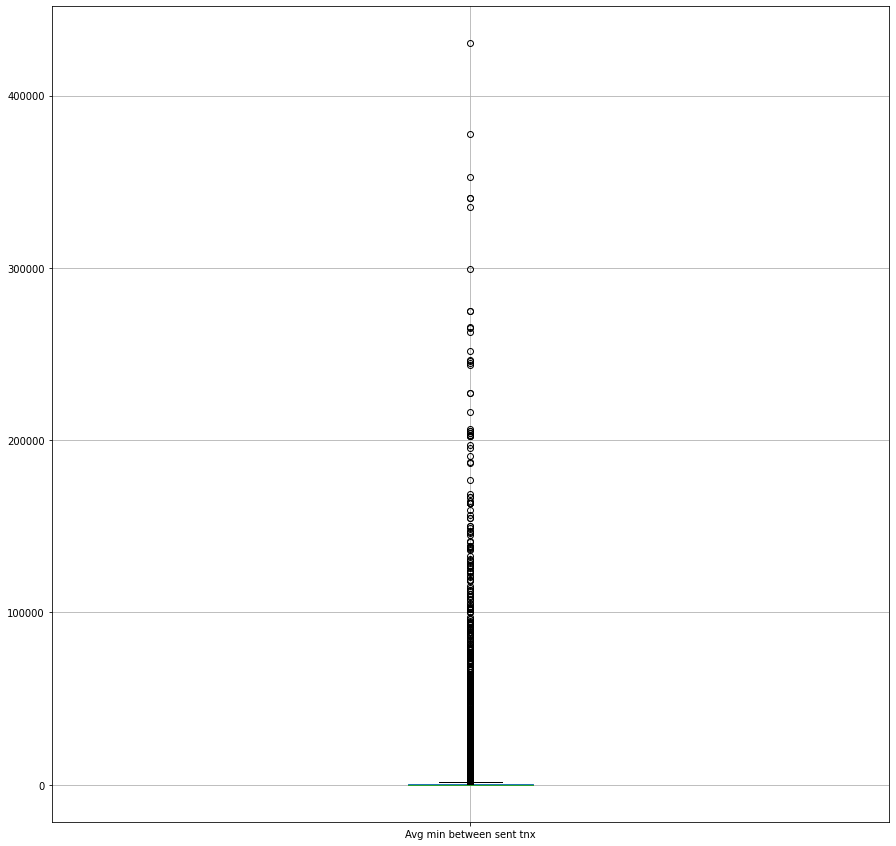

In [193]:
# box plot using pandas 
# box plot for Avg min between sent tnx column 
df.boxplot(column = 'Avg min between sent tnx', figsize = (15,15))

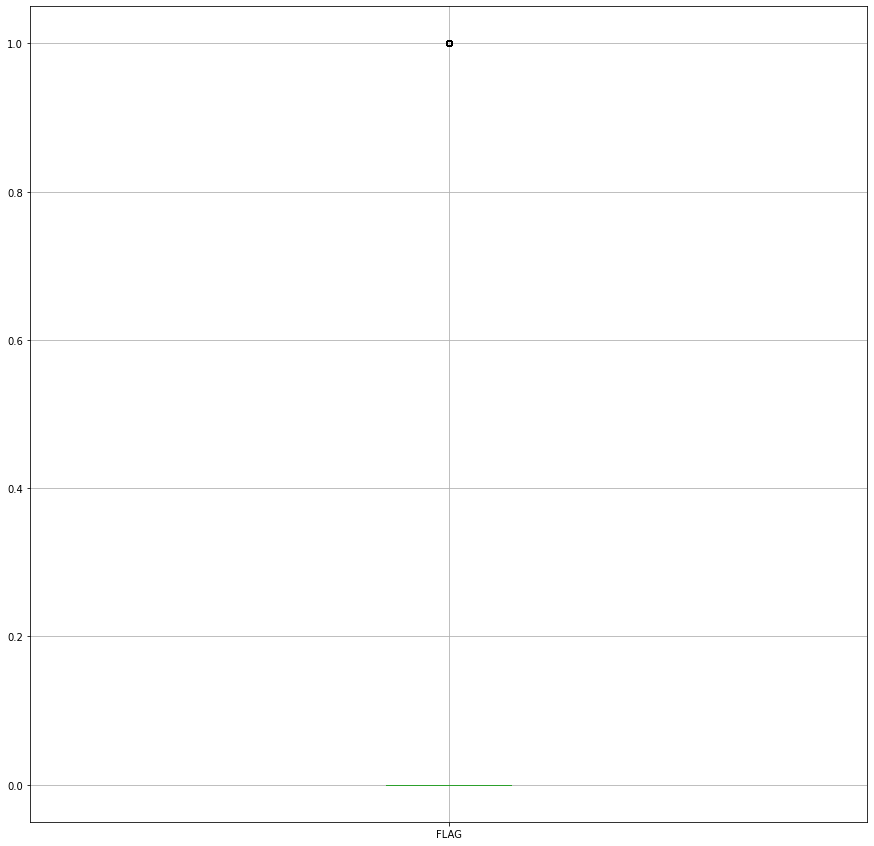

In [194]:
# box plot using pandas 
# box plot for FLAG column 
df.boxplot(column = 'FLAG', figsize = (15,15))

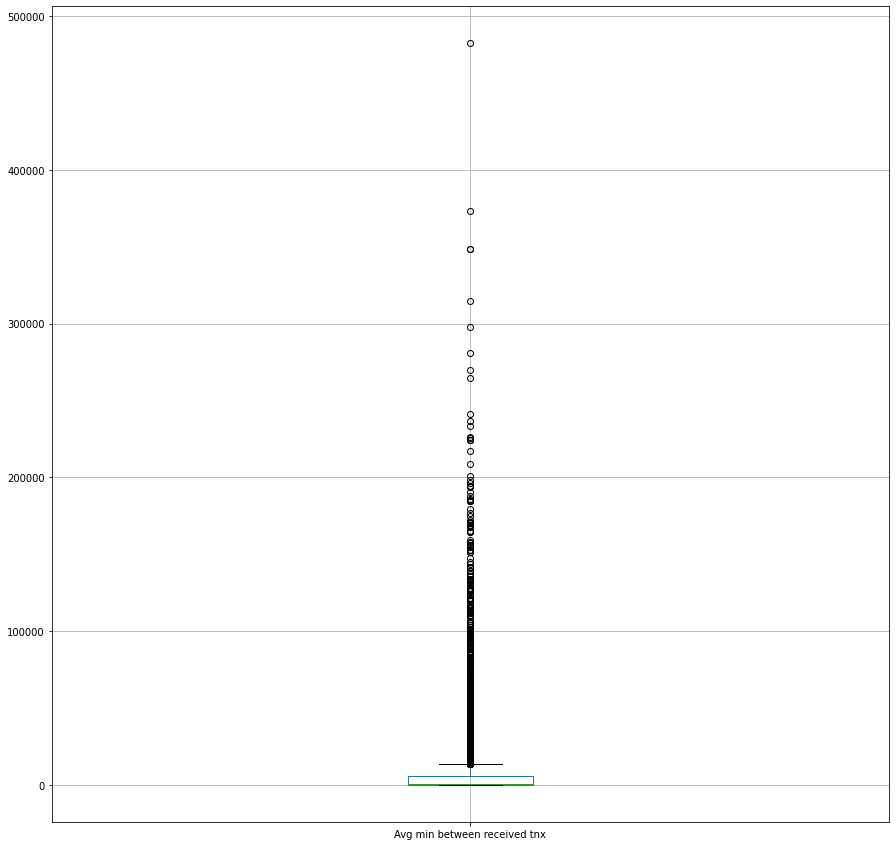

In [195]:
# box plot using pandas 
# box plot for Avg min between received tn column 
df.boxplot(column = 'Avg min between received tnx', figsize = (15,15))

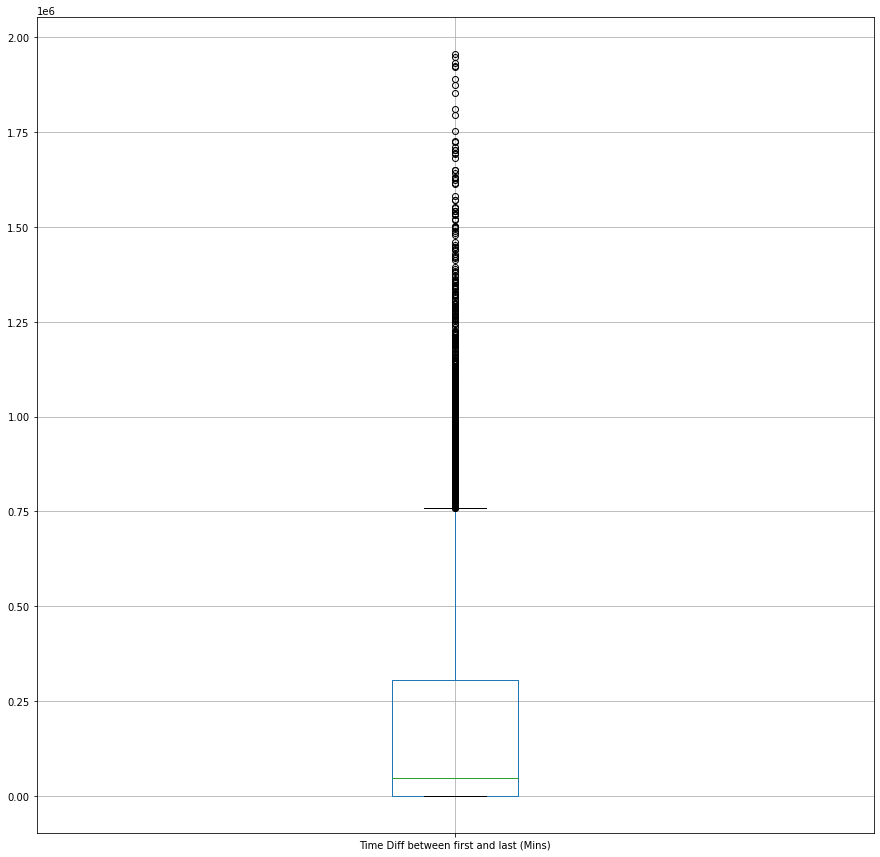

In [196]:
# box plot using pandas 
# box plot for Time Diff between first and last (Mins) column 
df.boxplot(column = 'Time Diff between first and last (Mins)', figsize = (15,15))

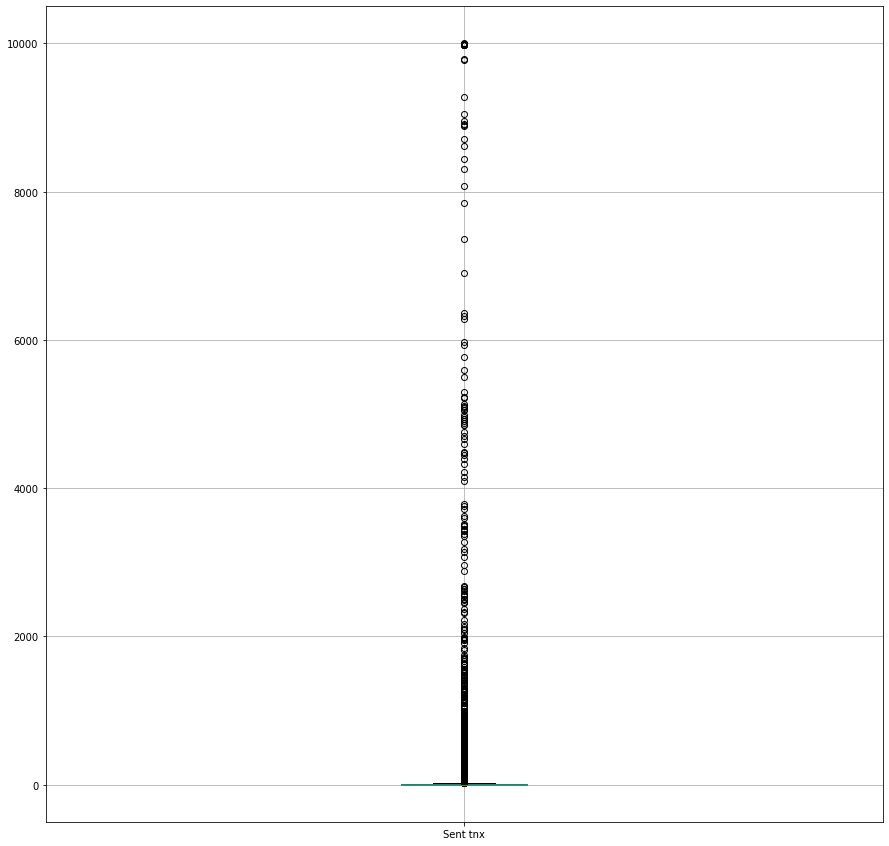

In [197]:
# box plot using pandas 
# box plot for Sent tnx column 
df.boxplot(column = 'Sent tnx', figsize = (15,15))

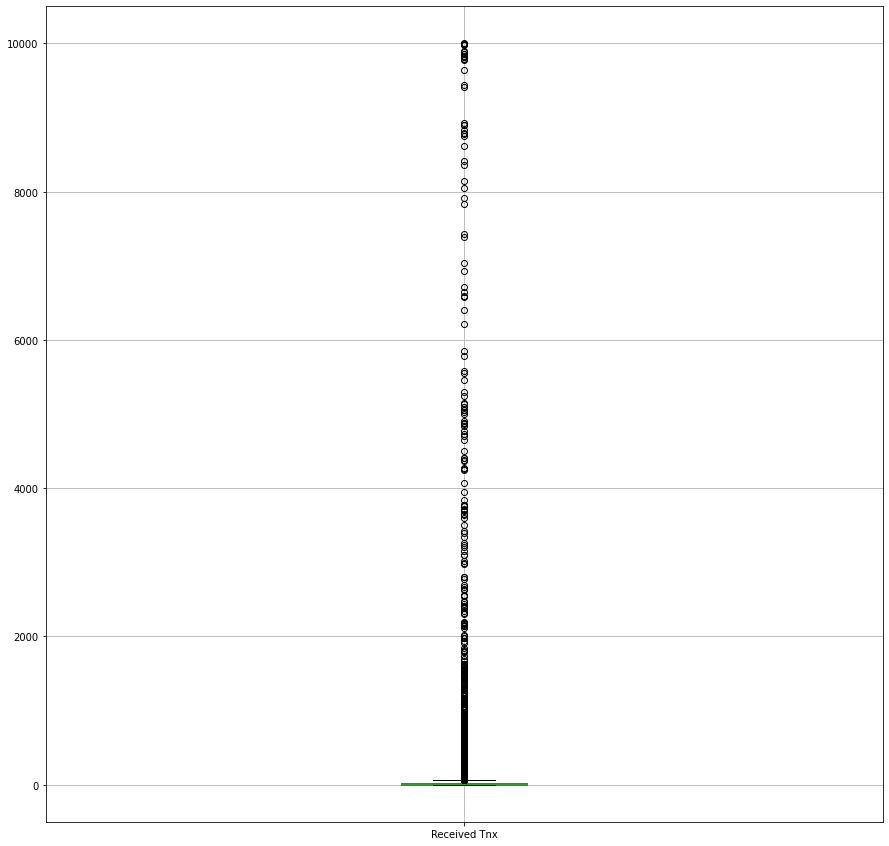

In [198]:
# box plot using pandas 
# box plot for Received Tnx column 
df.boxplot(column = 'Received Tnx', figsize = (15,15))

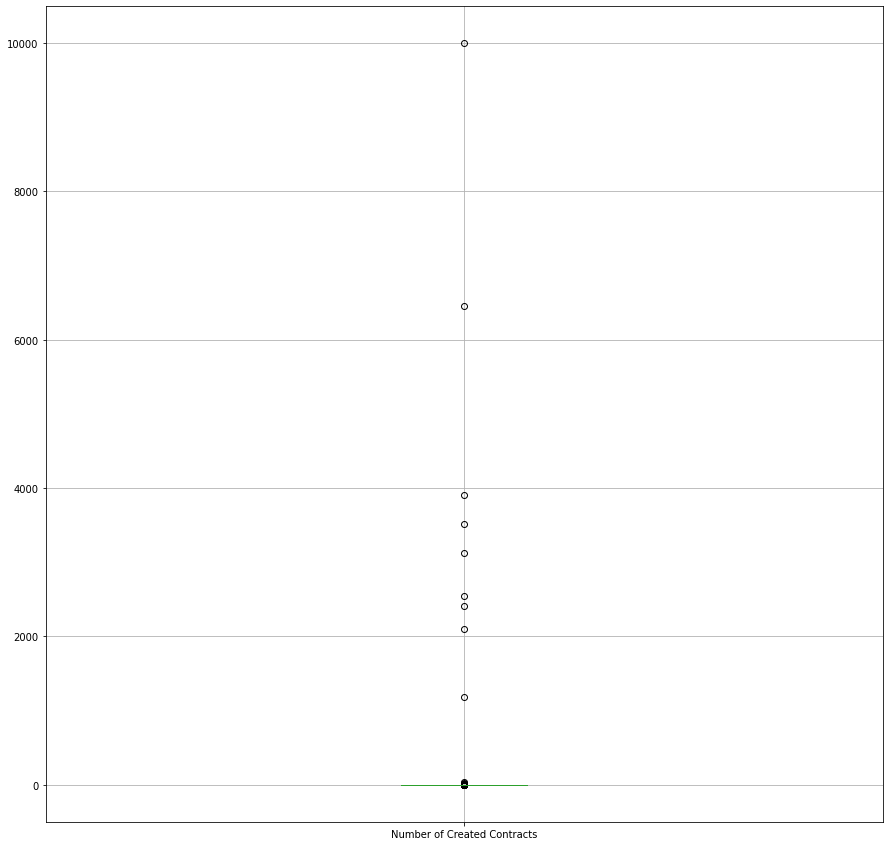

In [199]:
# box plot using pandas 
# box plot for Number of Created Contracts column 
df.boxplot(column = 'Number of Created Contracts', figsize = (15,15))

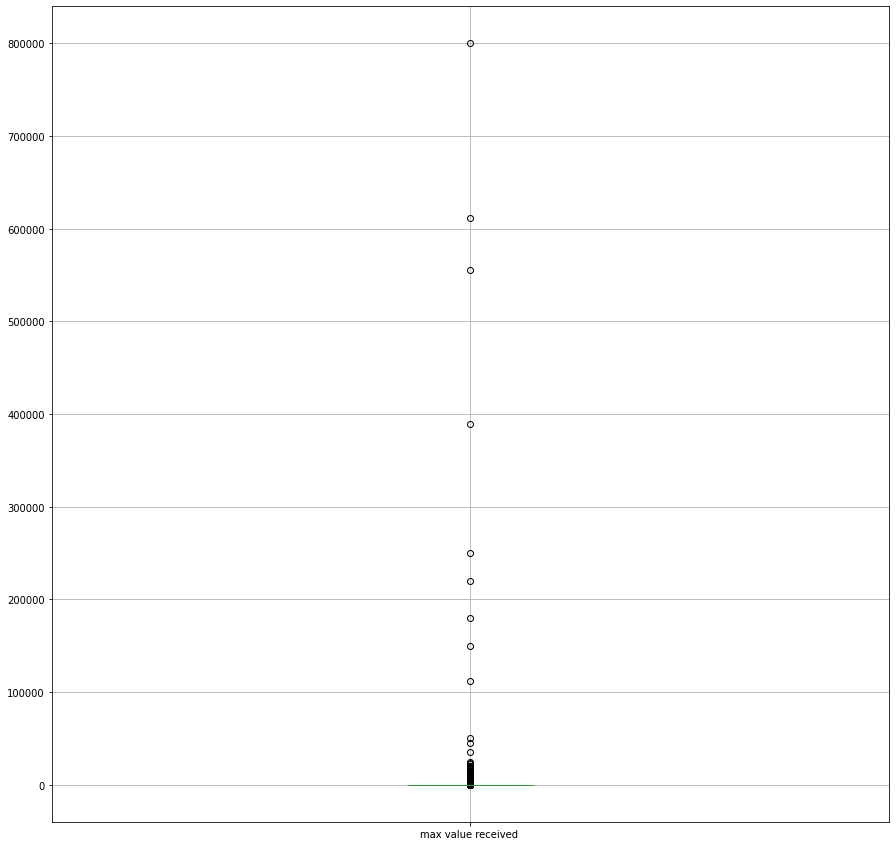

In [200]:
# box plot using pandas 
# box plot for max value received column 
df.boxplot(column = 'max value received ', figsize = (15,15))

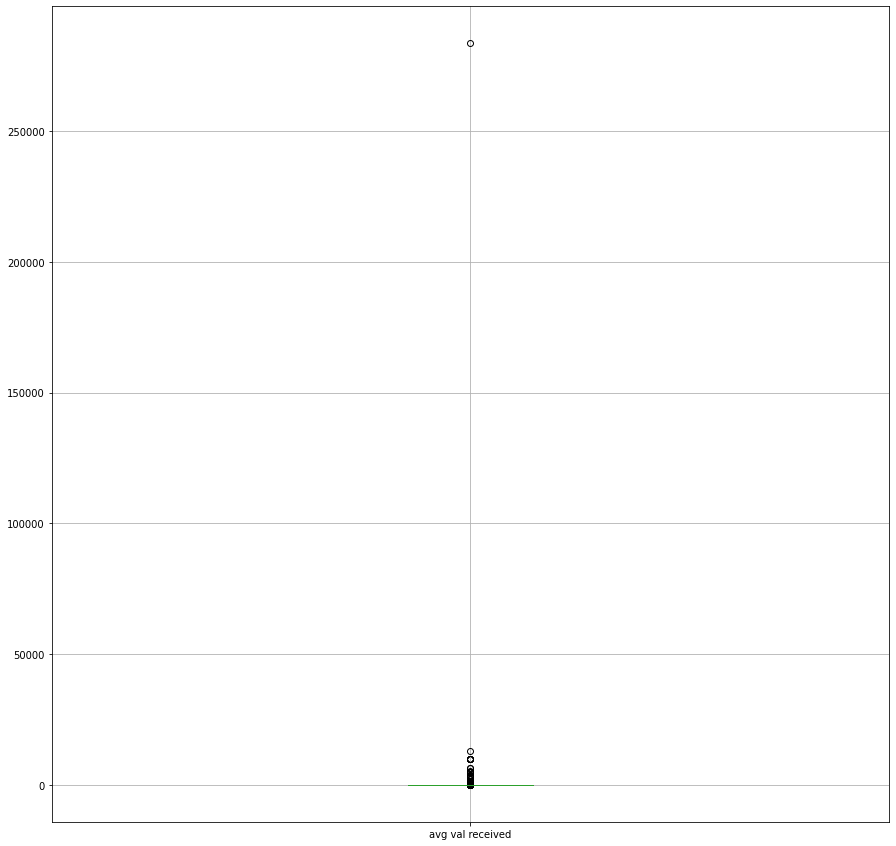

In [201]:
# box plot using pandas 
# box plot for vg val received column 
df.boxplot(column = 'avg val received', figsize = (15,15))

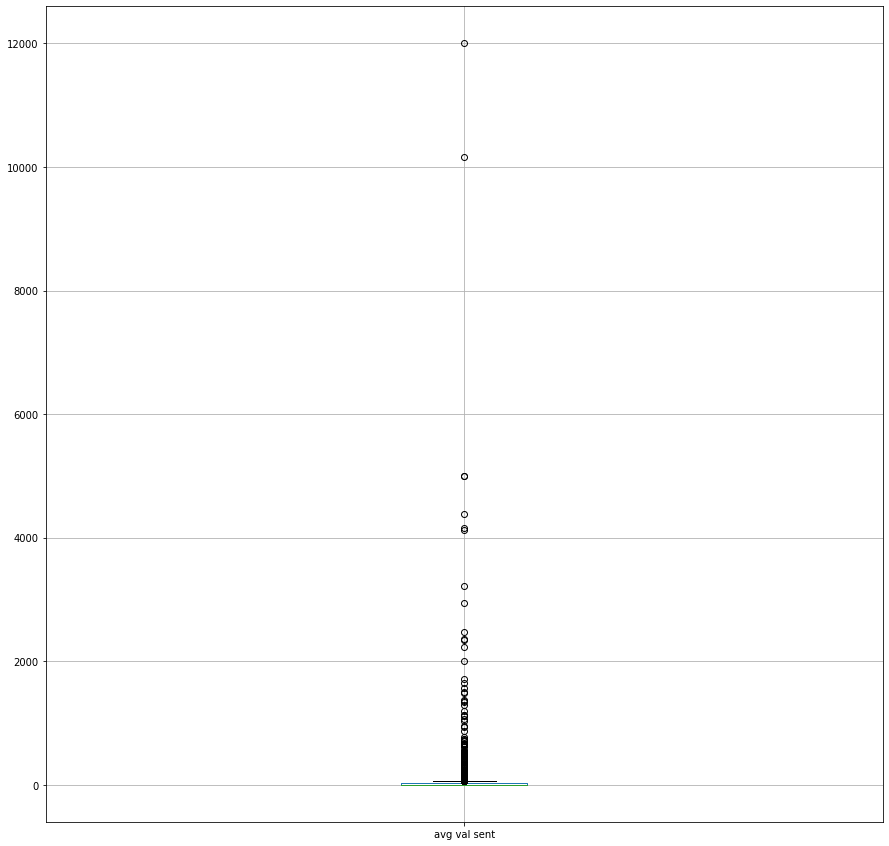

In [202]:
# box plot using pandas 
# box plot for avg val sent column 
df.boxplot(column = 'avg val sent', figsize = (15,15))

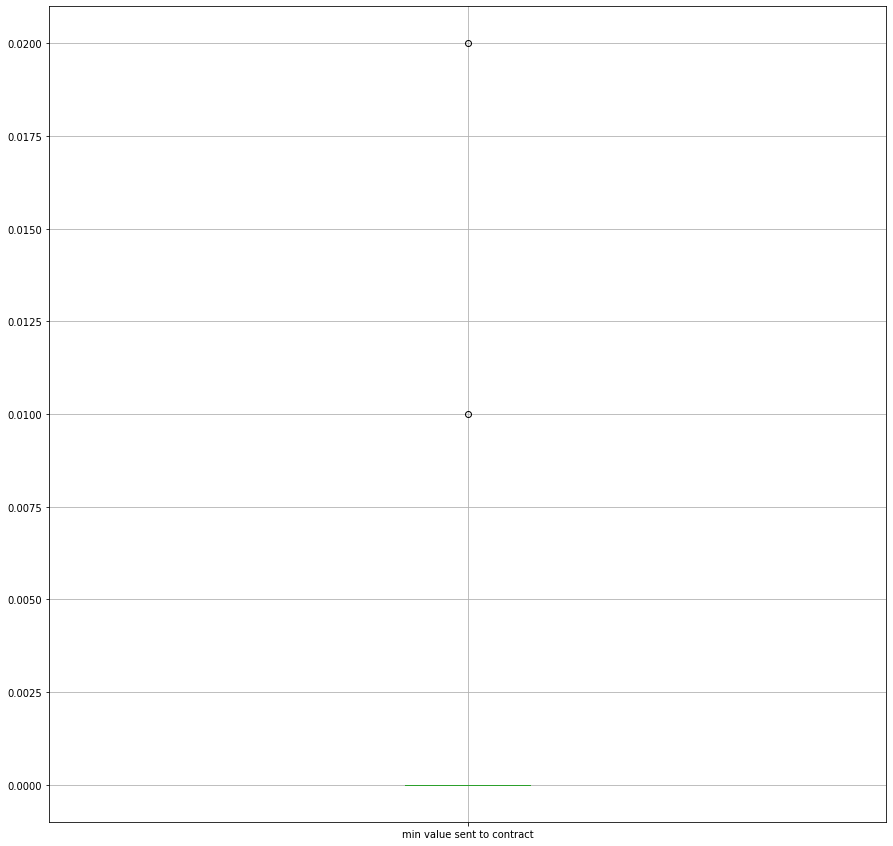

In [203]:
# box plot using pandas 
# box plot for min value sent to contract column 
df.boxplot(column = 'min value sent to contract', figsize = (15,15))

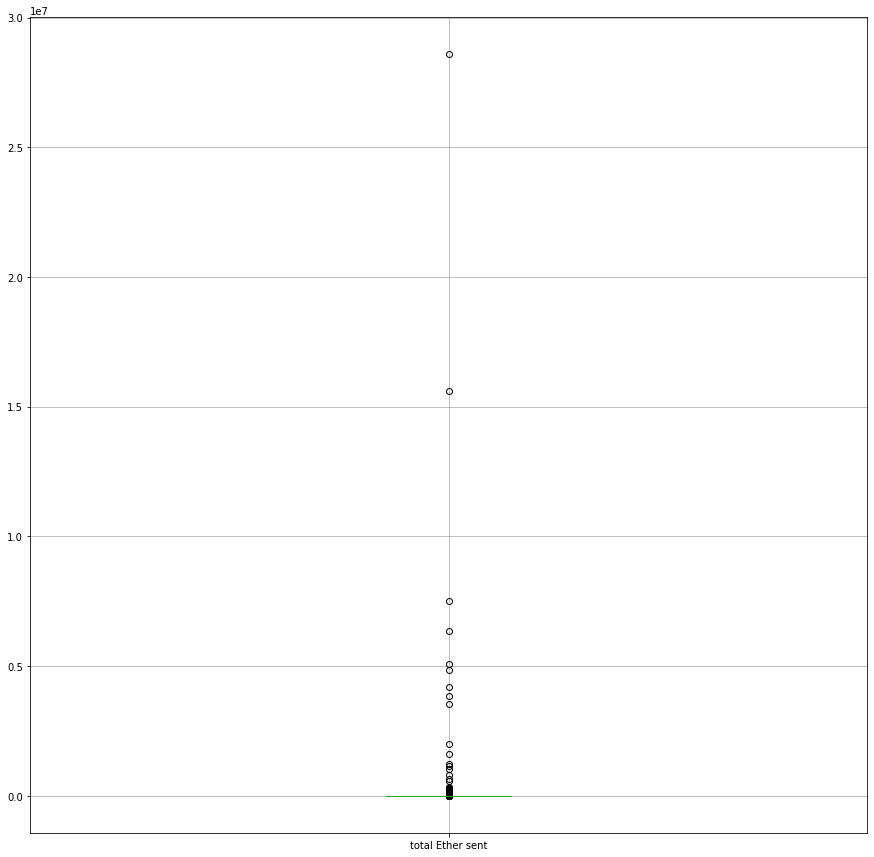

In [204]:
# box plot using pandas 
# box plot for total Ether sent column 
df.boxplot(column = 'total Ether sent', figsize = (15,15))

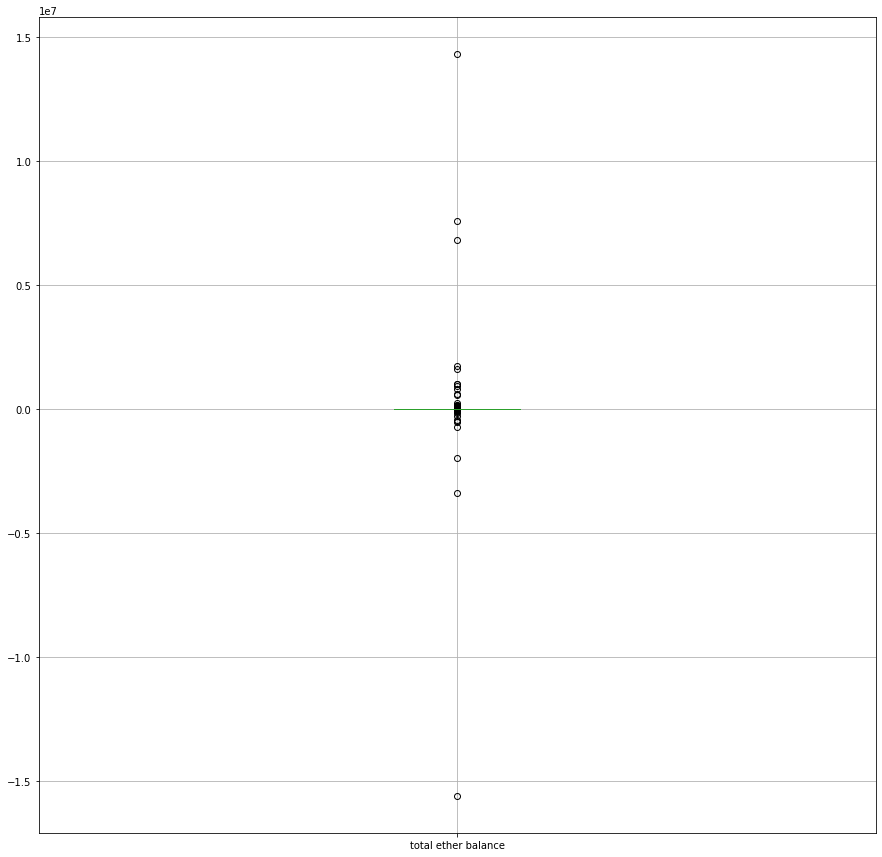

In [205]:
# box plot using pandas 
# box plot for total ether balance column 
df.boxplot(column = 'total ether balance', figsize = (15,15))

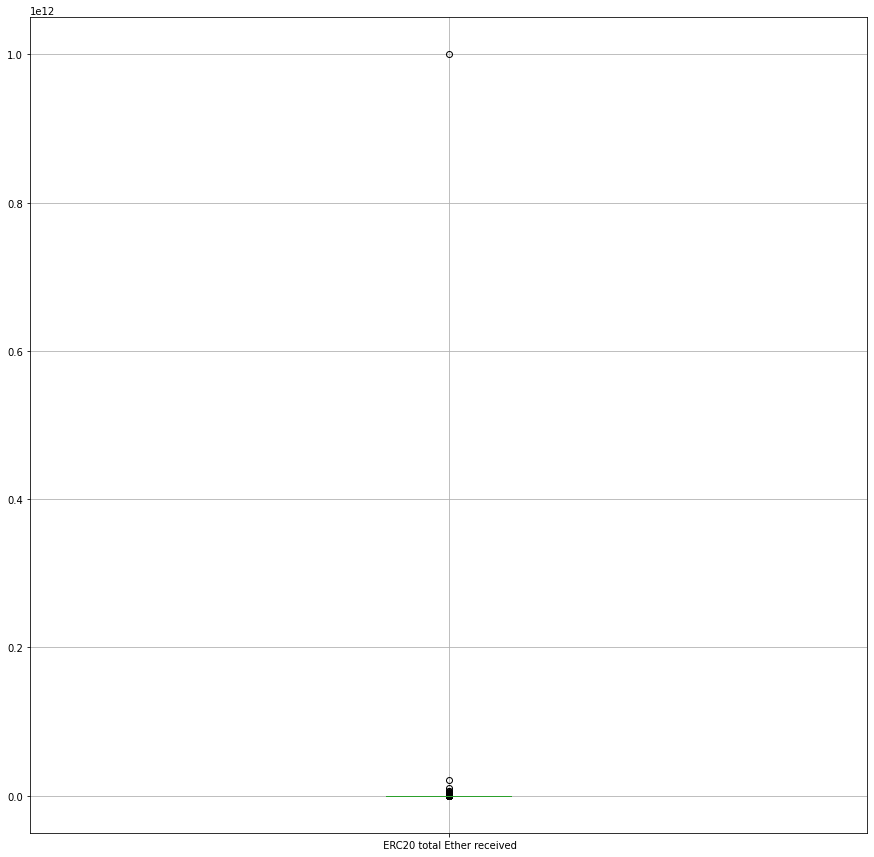

In [206]:
# box plot using pandas 
# box plot for ERC20 total Ether received column 
df.boxplot(column = ' ERC20 total Ether received', figsize = (15,15))

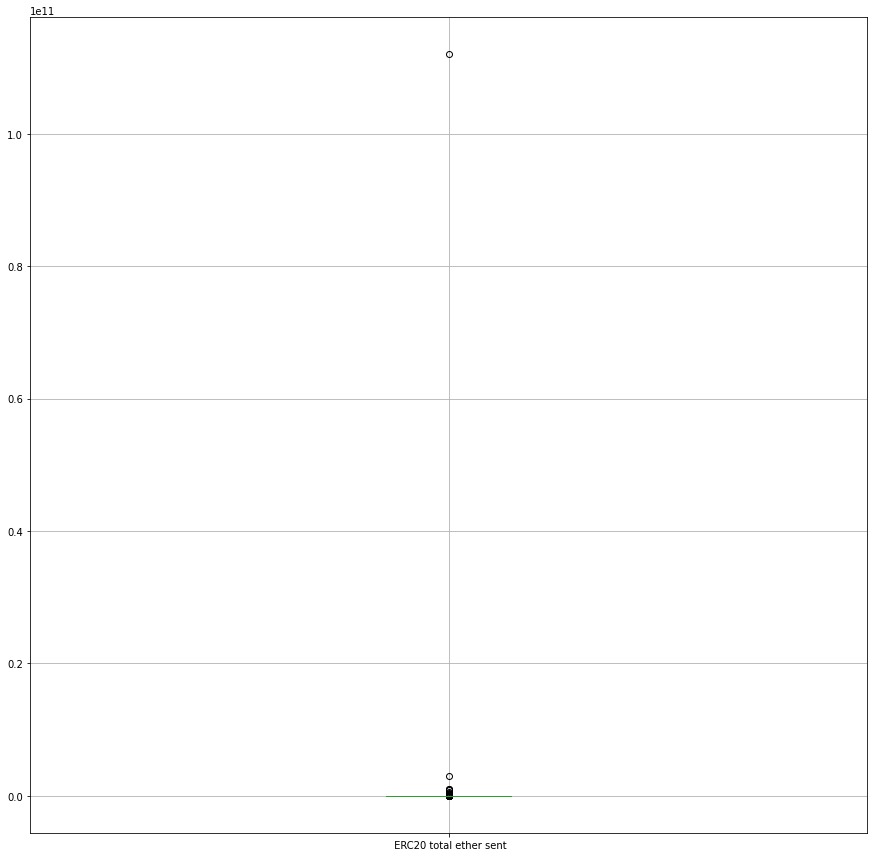

In [207]:
# box plot using pandas 
# box plot for ERC20 total ether sent column 
df.boxplot(column =  ' ERC20 total ether sent', figsize = (15,15))

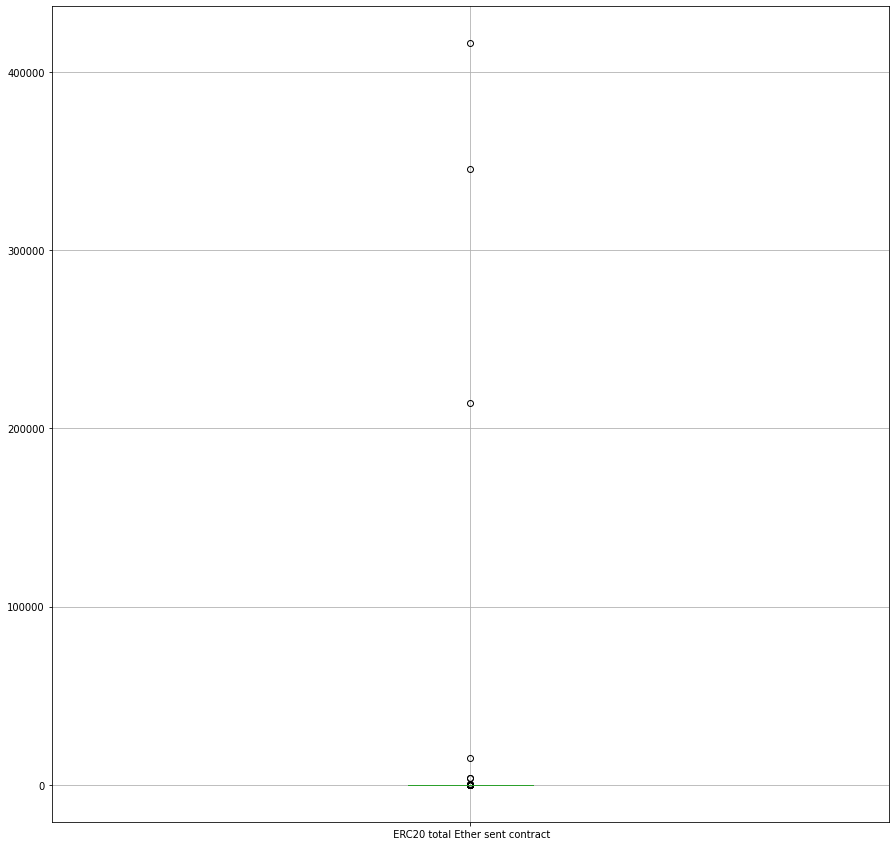

In [208]:
# box plot using pandas 
# box plot for ERC20 total Ether sent contract column 
df.boxplot(column =  ' ERC20 total Ether sent contract', figsize = (15,15))

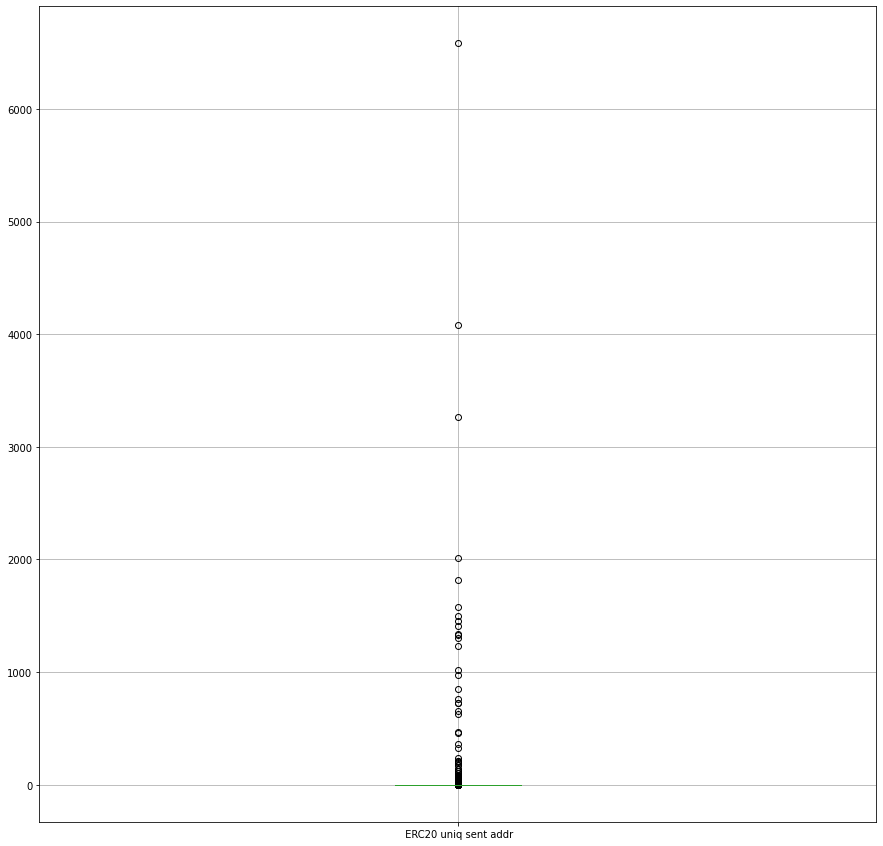

In [209]:
# box plot using pandas 
# box plot for ERC20 uniq sent addr column 
df.boxplot(column =  ' ERC20 uniq sent addr', figsize = (15,15))

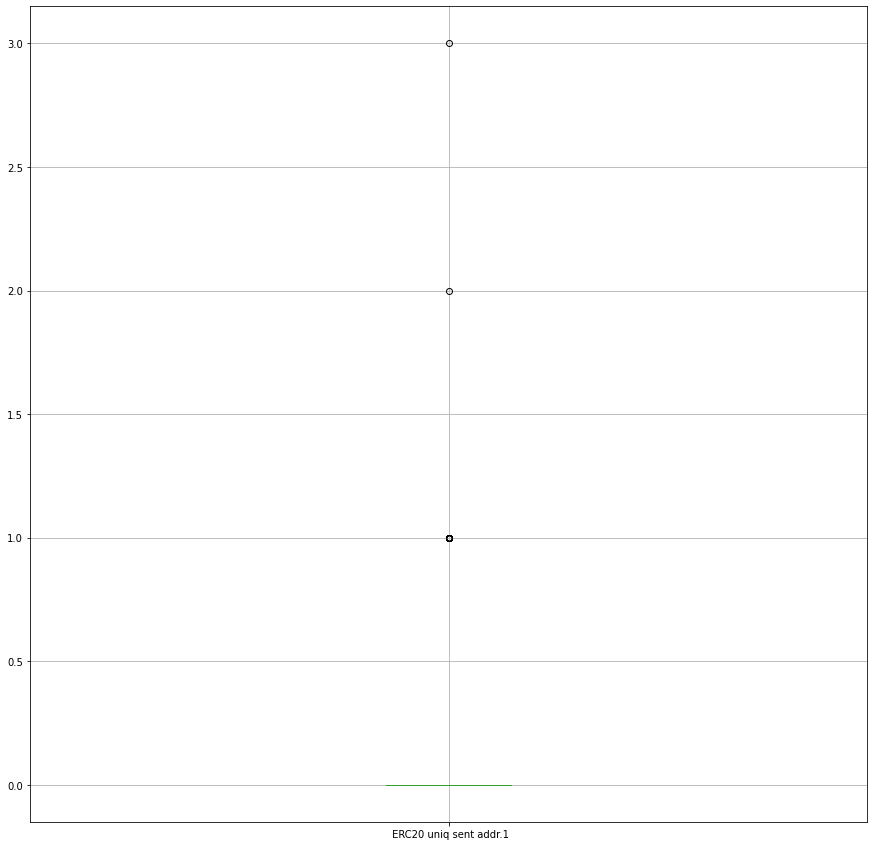

In [210]:
# box plot using pandas 
# box plot for ERC20 uniq sent addr.1 column 
df.boxplot(column =  ' ERC20 uniq sent addr.1', figsize = (15,15))

from all boxen plot we can see that the dataset is heavily skewed

# DATA PREPROCESSING



In [211]:
## Split the labels and the target
X = df.drop('FLAG', axis = 1)
y = df['FLAG']
#check the shape 
print(X.shape, y.shape)

(9841, 29) (9841,)


In [212]:
# import train test split
from sklearn.model_selection import train_test_split


In [213]:
# Split into training (80%) and testing set (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=42)

# check the shape of train and test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7872, 29) (1969, 29) (7872,) (1969,)


# HANDLING SKEWNESS

In [214]:
# import pipeline
from sklearn.pipeline import Pipeline
#import standaer scalar
from sklearn.preprocessing import StandardScaler
# import simple imputer
from sklearn.impute import SimpleImputer

In [215]:
# create pipeline
steps = [('imputer', SimpleImputer()), ('scaler', StandardScaler())]
# 1.simple imputer
# 2. standard scalar 
pipeline = Pipeline(steps)

In [216]:
# fit the pipline on train data
X_train = pipeline.fit_transform(X_train)

# HANDLING IMBALANCE

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

SMOTE - https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [221]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
# Instantiate
sm = SMOTE(random_state=42)
#fit on train data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# printthe shape of X_train After OverSampling
print('After OverSampling, the shape of train_X:', X_train_res.shape)
# printthe shape of y_train After OverSampling
print('After OverSampling, the shape of train_y: ', y_train_res.shape)

After OverSampling, the shape of train_X: (12240, 29)
After OverSampling, the shape of train_y:  (12240,)


# MODELING

In [218]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error, confusion_matrix, classification_report, accuracy_score
# Function for calculating all the relevant metrics 
def print_score(m):
  res = classification_report(y_test, m.predict(X_test))
  print('Classification report :', res)


# Logistic Regression

In [222]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegressor
from sklearn.linear_model import LogisticRegression
# Instantiate the model
lr = LogisticRegression()
# fitting the model on train data
lr.fit(X_train_res, y_train_res)
# print score of the model
print(classification_report(y_test, lr.predict(X_test)))



              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1542
           1       0.17      0.02      0.03       427

    accuracy                           0.77      1969
   macro avg       0.48      0.50      0.45      1969
weighted avg       0.65      0.77      0.69      1969

CPU times: user 353 ms, sys: 207 ms, total: 560 ms
Wall time: 291 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Random Forest Classifier

In [223]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model
rf = RandomForestClassifier()
# fitting the model on train data
rf.fit(X_train_res, y_train_res)
# print score of the model
print(classification_report(y_test, rf.predict(X_test)))



              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1542
           1       0.00      0.00      0.00       427

    accuracy                           0.78      1969
   macro avg       0.39      0.50      0.44      1969
weighted avg       0.61      0.78      0.69      1969

CPU times: user 2.21 s, sys: 5.62 ms, total: 2.21 s
Wall time: 2.21 s


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

# Hyperparameter Tuning 

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

# RandomizedSearchCV
RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

The first step is to write the parameters that we want to consider
From these parameters select the best ones.


In [127]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV




# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10], 
    'min_samples_leaf': range(100, 400, 200), 
    'min_samples_split': range(200, 500, 200), 
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}




# Create a based model (i.e RF) with random_state as 1
rf = RandomForestClassifier(random_state = 1)




# Instantiate the radom search model with estimator, param_grid, and random_state as 1
rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_grid, random_state = 1)

rs.fit(X_train_res, y_train_res)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   random_state=1)

In [128]:
# printing the optimal accuracy score and hyperparameters
rs.best_params_


{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [129]:
# Instantiate RF model with the best hyperparameters along with random_state as 1
rfc = RandomForestClassifier(n_estimators=300, max_depth=8, max_features=5, min_samples_leaf=100, min_samples_split=200, random_state=1)

In [224]:
# fit rfc on training data
rfc.fit(X_train_res, y_train_res)
# evaluation metrics using classification_report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1542
           1       0.00      0.00      0.00       427

    accuracy                           0.78      1969
   macro avg       0.39      0.50      0.44      1969
weighted avg       0.61      0.78      0.69      1969



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

# Decision Tree Classifier

In [225]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate the model
dtc = DecisionTreeClassifier()
# fitting the model on train data
dtc.fit(X_train_res, y_train_res)
# print score of the model
print(classification_report(y_test, dtc.predict(X_test)))
# visualizing importance of features


              precision    recall  f1-score   support

           0       1.00      0.55      0.71      1542
           1       0.38      0.99      0.55       427

    accuracy                           0.64      1969
   macro avg       0.69      0.77      0.63      1969
weighted avg       0.86      0.64      0.67      1969

CPU times: user 200 ms, sys: 0 ns, total: 200 ms
Wall time: 204 ms


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#Gradient Boosting Classifier

In [ ]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate the model
gb = GradientBoostingClassifier()
# fitting the model on train data
gb.fit(X_train_res, y_train_res)
# print score of the model
print(classification_report(y_test, gb.predict(X_test)))
# visualizing importance of features


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1542
           1       0.91      0.96      0.94       427

    accuracy                           0.97      1969
   macro avg       0.95      0.97      0.96      1969
weighted avg       0.97      0.97      0.97      1969

CPU times: user 7.71 s, sys: 51 µs, total: 7.71 s
Wall time: 7.98 s


#XGB Classifier

# Conclusion

We did training and prediction using all the above models and selected gradient boosting as final model as it performed well compard to other models with acurracy of 97%.

We have performed EDA, preprocessing, build different models, hyper parameter tunning and did prediction.

We also perform necessary operations to handle imbalanced and skewed nature of data. 
